In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.__version__,np.__version__

('2.3.2', '2.3.3')

# Cargando data

In [85]:
data = pd.read_csv('../data/car_fuel_efficiency_hw.csv')

In [86]:
data.head(5)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


## Preparing dataset
Seleccionando columnas

In [5]:
select_columns = ['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']

In [87]:
df_data = data[select_columns]

In [88]:
df_data.head(5)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [9]:
%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

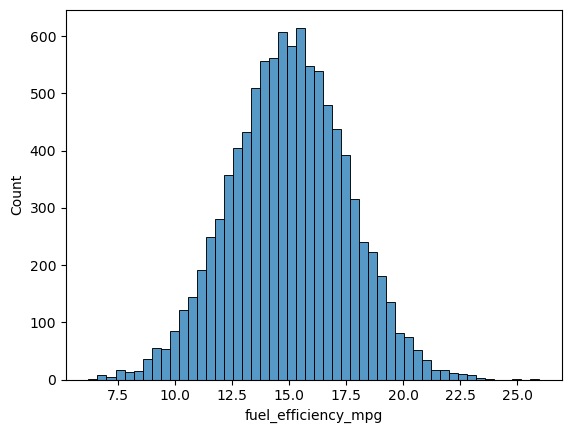

In [10]:
sns.histplot(data.fuel_efficiency_mpg, bins=50)

In [11]:
# Q1
df_data.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [12]:
# Q1
df_data['horsepower'].isnull().sum()

np.int64(708)

In [13]:
# Q2
df_data.horsepower.mean()

np.float64(149.65729212983547)

In [14]:
# Split the dataset
def data_split(df,seed):
    
    np.random.seed(seed)

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - n_val - n_test
    
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    return df_train,df_val, df_test

In [15]:
# Data
df_train,df_val,df_test = data_split(df_data,42)

In [16]:
# Data set
df_train.shape

(5824, 5)

In [17]:
# y_train
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values


del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [18]:
df_train.shape,y_train.shape

((5824, 4), (5824,))

In [19]:
# Q3
#fill it with 0
def prepare_X0(df):
    df_num = df.copy()
    df_num = df_num.fillna(0)
    X = df_num
    return X

In [20]:
# Q3
#fill it with mean
def prepare_XMean(df,data_train):
    fill_mean = df.copy()
    for column in df.columns:
        fill_mean[column] = fill_mean[column].fillna(data_train[column].mean())
    X = fill_mean
    return X

In [21]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [22]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Zero

In [53]:
# Q3
#fill it with 0
fill_train0 = prepare_X0(df_train)
fill_train0 = df_train.copy()
fill_val0 = prepare_X0(df_val)
fill_test0 = prepare_X0(df_test)

In [47]:
fill_train0.describe()

,engine_displacement,horsepower,vehicle_weight,model_year
count,5824.000000,5824.000000,5824.000000,5824.000000
mean,199.429945,138.529190,3006.672919,2011.444712
std,49.543177,48.357282,497.856998,6.669193
min,10.000000,0.000000,952.681761,2000.000000
25%,170.000000,123.000000,2669.313374,2006.000000
50%,200.000000,146.000000,2993.348283,2011.000000
75%,230.000000,168.000000,3342.151520,2017.000000
max,380.000000,246.000000,4610.973229,2023.000000


In [48]:
fill_train_0_w0, fill_train_0_w = train_linear_regression(fill_train0, y_train)

In [49]:
fill_train_0_w0, fill_train_0_w

(np.float64(28.827365474074796),
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992869e-04]))

In [50]:
# Y Train mean
y_train_0_pred = fill_train_0_w0 + fill_train0.values.dot(fill_train_0_w)
print('Train:', rmse(y_train, y_train_0_pred))

Train: 0.5202614265099076


In [51]:
print('Train:', round( rmse(y_train, y_train_0_pred), 2))

Train: 0.52


<Axes: ylabel='Count'>

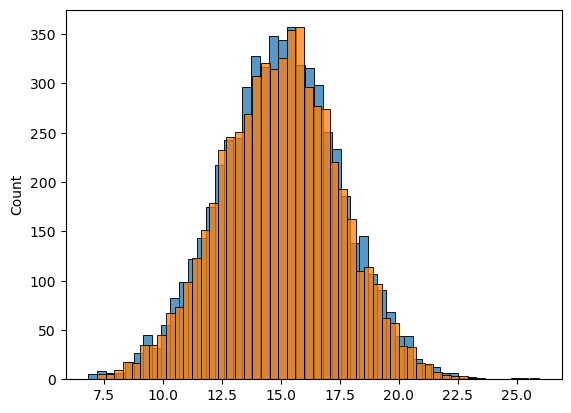

In [52]:
sns.histplot(y_train, bins=50)
sns.histplot(y_train_0_pred, bins=50)

# Mean

In [33]:
# Q3
#fill it with mean
#df_train['horsepower'].mean()
fill_trainmean = prepare_XMean(df_train,df_train)
fill_valmean = prepare_XMean(df_val,df_train)
fill_testmean = prepare_XMean(df_test,df_train)


In [34]:
fill_trainmean.describe()

,engine_displacement,horsepower,vehicle_weight,model_year
count,5824.000000,5824.000000,5824.000000,5824.000000
mean,199.429945,149.544764,3006.672919,2011.444712
std,49.543177,28.498880,497.856998,6.669193
min,10.000000,46.000000,952.681761,2000.000000
25%,170.000000,131.000000,2669.313374,2006.000000
50%,200.000000,149.544764,2993.348283,2011.000000
75%,230.000000,168.000000,3342.151520,2017.000000
max,380.000000,246.000000,4610.973229,2023.000000


In [36]:
fill_train_mean_w0, fill_train_mean_w = train_linear_regression(fill_trainmean.values, y_train)

In [37]:
fill_train_mean_w0, fill_train_mean_w

(np.float64(28.925259951498806),
 array([ 0.00012093,  0.01030308, -0.00501009, -0.00023463]))

In [38]:
# Y Train mean
y_train_mean_pred = fill_train_mean_w0 + fill_trainmean.values.dot(fill_train_mean_w)
print('Train:', rmse(y_train, y_train_mean_pred))

Train: 0.46244121379599645


<Axes: ylabel='Count'>

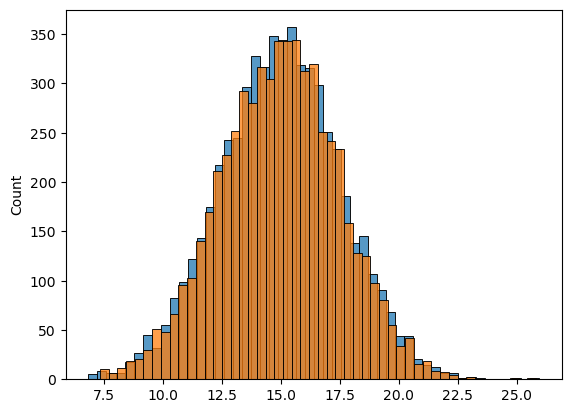

In [39]:
sns.histplot(y_train, bins=50)
sns.histplot(y_train_mean_pred, bins=50)

# Reg

In [55]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [62]:
# Q4
#X_train = prepare_X0(df_train)
for r_ in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(fill_train0, y_train, r_)
    y_pred = w_0 + fill_val0.dot(w)
    print(( r,rmse(y_val, y_pred),round(rmse(y_val, y_pred),2)))

(100, np.float64(0.5173782638840104), np.float64(0.52))
(100, np.float64(0.517111552577136), np.float64(0.52))
(100, np.float64(0.5187525130702144), np.float64(0.52))
(100, np.float64(0.5222348802092666), np.float64(0.52))
(100, np.float64(0.5228916092823519), np.float64(0.52))
(100, np.float64(0.5229812979636583), np.float64(0.52))
(100, np.float64(0.523063623381993), np.float64(0.52))


# Multiple Splitting

In [64]:
list_rmse = []
for m_seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    df_train, df_val,no1_ = data_split(df_data,m_seed)

    Y_train = df_train['fuel_efficiency_mpg'].values
    Y_val = df_val['fuel_efficiency_mpg'].values
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']

    X_train_m = prepare_X0(df_train)
    X_val_m = prepare_X0(df_val)

    w0, w = train_linear_regression(X_train_m,Y_train)
    y_pred = w0 + X_val_m.dot(w)

    val_rmse = rmse(Y_val, y_pred)
    list_rmse.append(val_rmse)
    
    print('train, seed : %5s, rmse: %5s' % ( m_seed,val_rmse))
    

train, seed :     0, rmse: 0.5206531296286018
train, seed :     1, rmse: 0.5213388912861504
train, seed :     2, rmse: 0.5228069974692388
train, seed :     3, rmse: 0.5159516741085217
train, seed :     4, rmse: 0.5109129460088697
train, seed :     5, rmse: 0.5283406460156541
train, seed :     6, rmse: 0.531391065815884
train, seed :     7, rmse: 0.509067038737912
train, seed :     8, rmse: 0.5147399129397889
train, seed :     9, rmse: 0.5131865908276104


In [68]:
# Q5
np.std(list_rmse)

np.float64(0.006989446427001858)

In [98]:
df_train, df_val,df_test = data_split(df_data,9)

df_tmp = pd.concat([df_train, df_val])

Y_train = df_tmp['fuel_efficiency_mpg'].values
Y_test = df_test['fuel_efficiency_mpg'].values

del df_tmp['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

X_train = prepare_X0(df_tmp)

w0, w = train_linear_regression_reg(X_train,Y_train,0.001)
y_pred = w0 + df_test.dot(w)

val_rmse = rmse(Y_test, y_pred)
    
print('rmse: %5s' % (val_rmse))
    

rmse: 0.4982088124928206
